In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv('churn.csv')

print("Data loaded successfully!")

Data loaded successfully!


In [47]:
print("Shape of the data:", data.shape)
print("Column names:")
print(data.columns)

print("\nData types:")
print(data.dtypes)

Shape of the data: (7043, 21)
Column names:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='str')

Data types:
customerID              str
gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges            str
Churn

In [48]:
data.columns = data.columns.str.lower().str.replace(" ", "").str.replace("_", "")

print(data.columns)


Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='str')


In [49]:
print("Missing values in each column:")
print(data.isnull().sum())


Missing values in each column:
customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64


In [50]:
data.head(15)


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [51]:
# Count how many customers churned and how many did not
churn_counts = data['churn'].value_counts()

print(churn_counts)


churn
No     5174
Yes    1869
Name: count, dtype: int64


Text(0, 0.5, 'Customer Count')

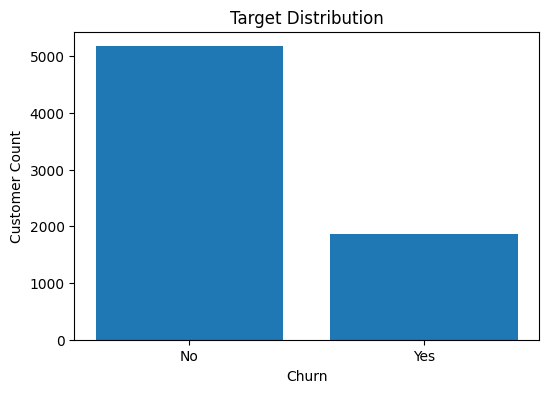

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

plt.bar(churn_counts.index, churn_counts.values)

plt.title("Target Distribution")
plt.xlabel("Churn")
plt.ylabel("Customer Count")


In [53]:
#setting churn as 1 or 0 for Yes or No respectively
data['churn'] = np.where(data['churn']=='Yes',1,0)

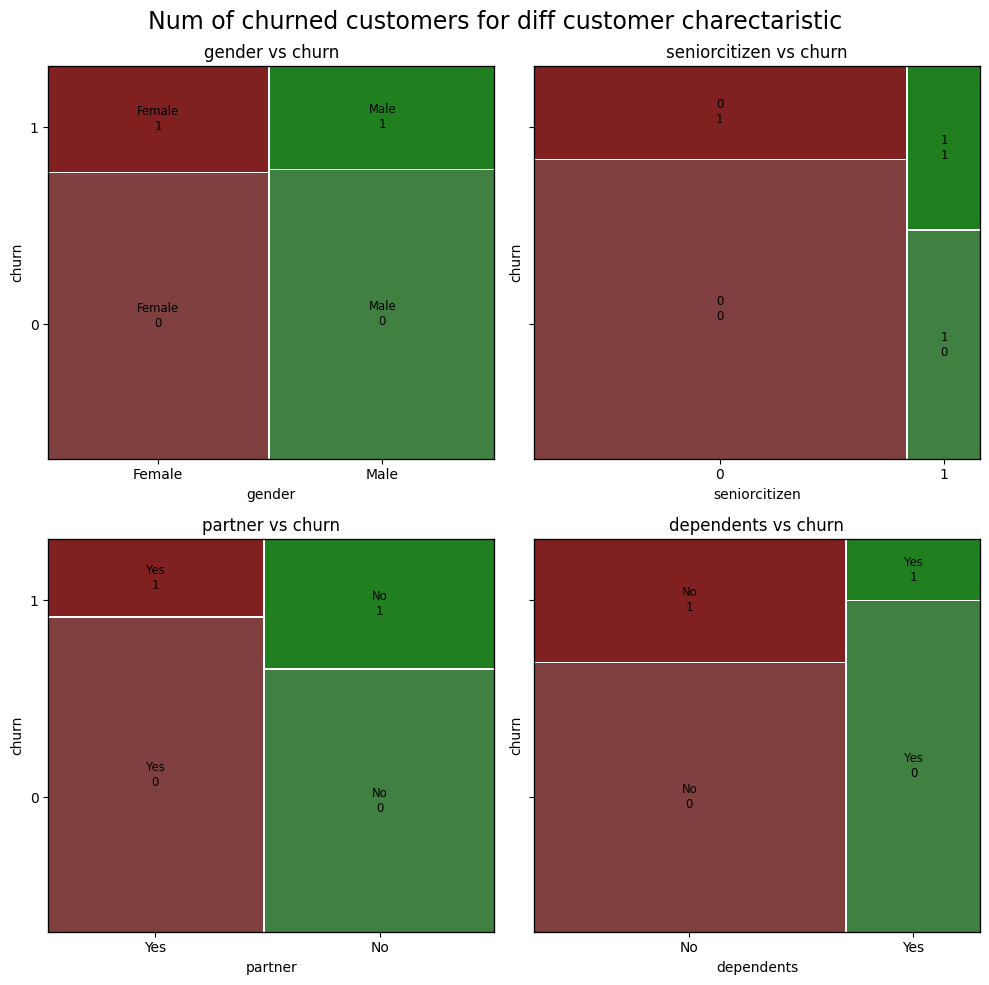

In [54]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt


fig, ax = plt.subplots(2,2, figsize=(10,10), sharey=True)

plt.suptitle('Num of churned customers for diff customer charectaristic',fontsize=17)

mosaic(data, ['gender', 'churn'], ax=ax[0,0])
ax[0,0].set_title('gender vs churn')
ax[0,0].set_xlabel('gender')
ax[0,0].set_ylabel('churn')

mosaic(data, ['seniorcitizen', 'churn'], ax=ax[0,1])
ax[0,1].set_title('seniorcitizen vs churn')
ax[0,1].set_xlabel('seniorcitizen')
ax[0,1].set_ylabel('churn')

mosaic(data, ['partner', 'churn'], ax=ax[1,0])
ax[1,0].set_title('partner vs churn')
ax[1,0].set_xlabel('partner')
ax[1,0].set_ylabel('churn')

mosaic(data, ['dependents', 'churn'], ax=ax[1,1])
ax[1,1].set_title('dependents vs churn')
ax[1,1].set_xlabel('dependents')
ax[1,1].set_ylabel('churn')

plt.tight_layout()
plt.show()



Ratio of churn is not significantly different for gender. 

Customers who does not have partner or dependants have a higher possibility of churning. They may be only having mobile connections and are ok to change it - attracted to better discounts,offers or better data plans.

Customers with partners and dependents doesnt prefer to change. This could be to avoid changing numbers often as this could be majorly working class. 

Churn ratio is higher for senior citizens - this could be to save money, or not being internet savy.

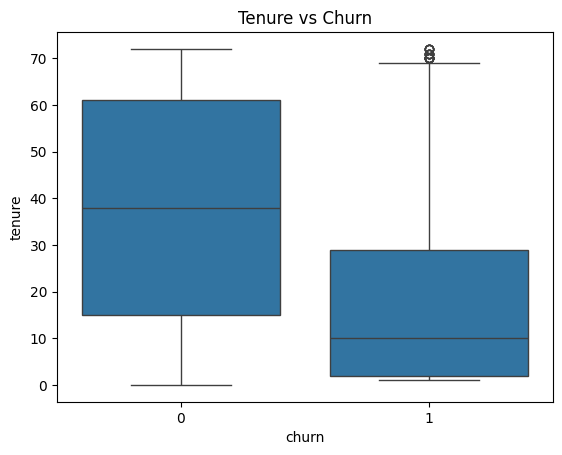

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='churn', y='tenure', data=data)
plt.title("Tenure vs Churn")
plt.show()

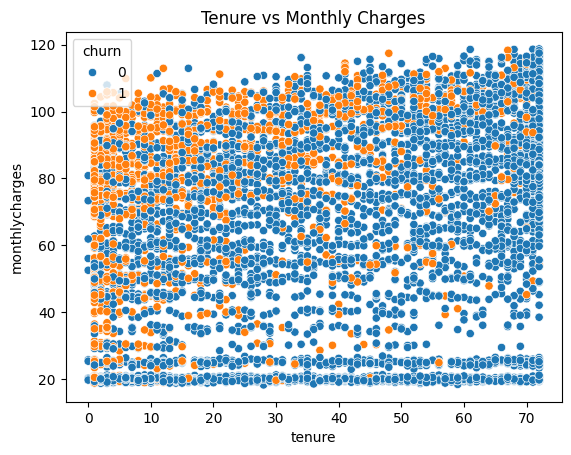

In [56]:
sns.scatterplot(x='tenure', y='monthlycharges', hue='churn', data=data)
plt.title("Tenure vs Monthly Charges")
plt.show()


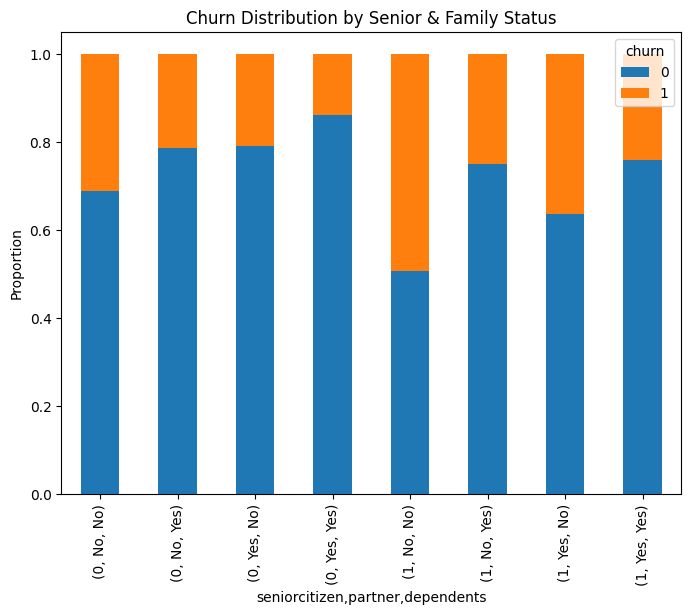

In [57]:
family_churn = pd.crosstab(
    [data['seniorcitizen'], data['partner'], data['dependents']],
    data['churn'],
    normalize='index'
)

family_churn.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Churn Distribution by Senior & Family Status")
plt.ylabel("Proportion")
plt.show()


The churn rate is higher for monthly contracts concentrated for less than one year tenures. These could be customers who are testing the service 

Customers with Partners and Dependants are more stable in the subscription and they tend to prefer annual contracts. 

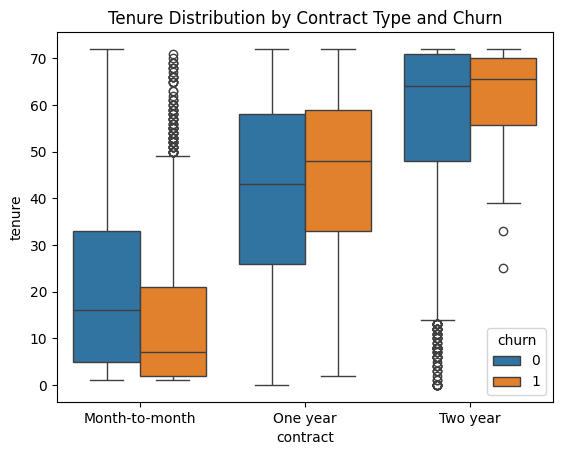

In [58]:
sns.boxplot(
    x='contract',
    y='tenure',
    hue='churn',
    data=data
)

plt.title("Tenure Distribution by Contract Type and Churn")
plt.show()


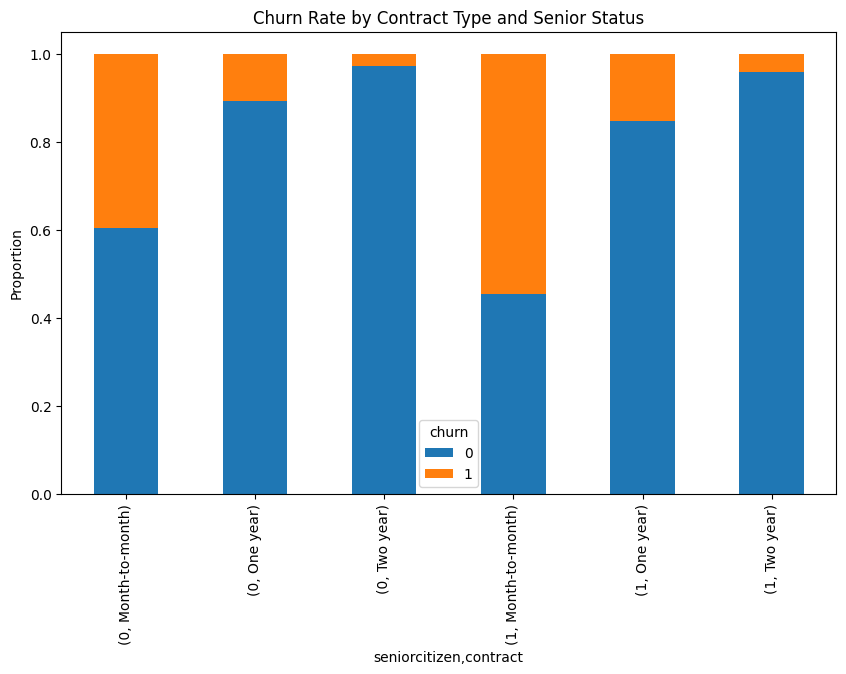

In [59]:
churn_rate = pd.crosstab(
    [data['seniorcitizen'], data['contract']],
    data['churn'],
    normalize='index'
)

churn_rate.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Churn Rate by Contract Type and Senior Status")
plt.ylabel("Proportion")
plt.show()


Senior citizens doesnt prefer yearly contracts. They prefer to take monthly contracts and the churn rate is also high which explains first figure. 

In [60]:
#Lets understand how the phone and internet service is spread among the customers. 
#what % of churned customers has no phone service, multiple lines and no lines
churn_df= data.query("churn==1")

In [61]:
# Count churned customers by Multiple Lines
multiple_counts = churn_df['multiplelines'].value_counts()

# Count churned customers by Internet Service
internet_counts = churn_df['internetservice'].value_counts()

print(multiple_counts)
print(internet_counts)


multiplelines
Yes                 850
No                  849
No phone service    170
Name: count, dtype: int64
internetservice
Fiber optic    1297
DSL             459
No              113
Name: count, dtype: int64


In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

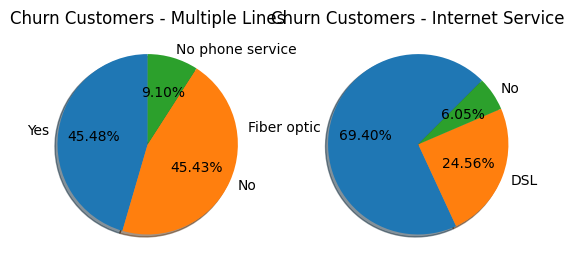

In [63]:
plt.subplot(1,2,1)

plt.pie(
    multiple_counts.values,
    labels=multiple_counts.index,
    autopct='%1.2f%%',
    startangle=90,
    shadow=True
)

plt.title("Churn Customers - Multiple Lines")


plt.subplot(1,2,2)

plt.pie(
    internet_counts.values,
    labels=internet_counts.index,
    autopct='%1.2f%%',
    startangle=45,
    shadow=True
)

plt.title("Churn Customers - Internet Service")

plt.show()





Lets convert categorical data into numbers. 
Phone Service and Internet Service are the major services with other services branching out from there. 
Customer traits are also objects.


In [ ]:
# Replace blank spaces with NaN
data['totalcharges'] = data['totalcharges'].replace(" ", None)

# Convert to numeric
data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors='coerce')


In [ ]:
print(data['totalcharges'].isnull().sum())
data['totalcharges'] = data['totalcharges'].fillna(0)
data.isnull().sum()


0


customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Total Charges are computed based on Tenure and Monthly Charges. We can omit this in the modelling

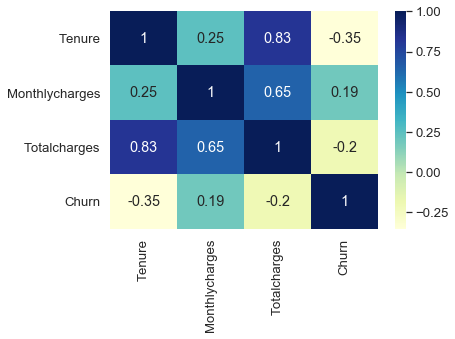

In [ ]:
#correlation heatmap of tenure, monthly charges, total charges, and churn
#converting Total charges to float
data['Totalcharges'] = pd.to_numeric(data.Totalcharges, errors='coerce').fillna(0)
corr = data[['Tenure','Monthlycharges','Totalcharges','Churn']].corr()
sns.heatmap(corr,cmap='YlGnBu',annot=True)
plt.show()

Total charges is correlated with Tenure and Monthly charges. Customer who stays for a longer tenure will have less chances of churning. 

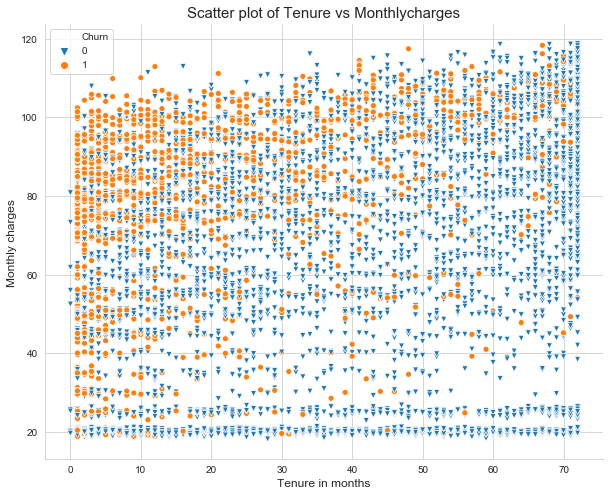

In [ ]:
# Lets check Tenure vs monthly charges for customer churn 
plt.figure(figsize=(10,8))
plt.title('Scatter plot of Tenure vs Monthlycharges',fontsize=15)
b = sns.scatterplot(x='Tenure', y='Monthlycharges', hue='Churn', style ='Churn', markers = ['v','o'],data=data)
b.set_xlabel('Tenure in months',fontsize=12)
b.set_ylabel('Monthly charges ',fontsize=12)
sns.despine()
plt.show()

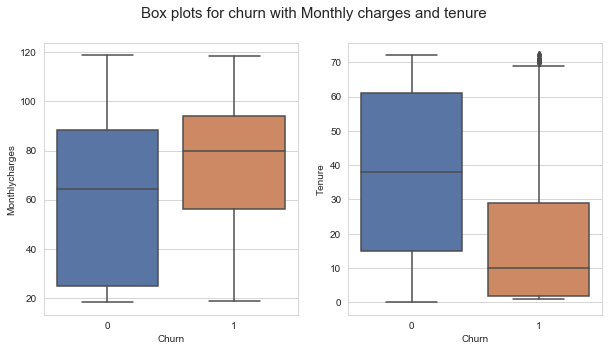

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), sharex=True)
sns.set(font_scale=1.2)
fig.suptitle('Box plots for churn with Monthly charges and tenure',fontsize=15)
sns.boxplot(x='Churn',y='Monthlycharges',data=data, ax= ax1)
sns.boxplot(x='Churn',y='Tenure', data=data, ax=ax2)
plt.show()

Customers with higher monthly charges and who are not more than an year old have a higher churn rate. We also observed that customers with monthly contract had a higher churn rate. We can draw a hypothesis that monthly contracts with more than 80 $ charges are likely to churn. 

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss

def cramers_v(x, y):
    
    # Step 1: Create contingency table
    confusion_matrix = pd.crosstab(x, y)
    
    # Step 2: Run Chi-square test
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    
    # Step 3: Total number of observations
    n = confusion_matrix.sum().sum()
    
    # Step 4: Calculate phi-square
    phi2 = chi2 / n
    
    # Step 5: Get number of rows and columns
    r, k = confusion_matrix.shape
    
    # Step 6: Compute Cramer's V
    cramers_v = np.sqrt(phi2 / min(k - 1, r - 1))
    
    return cramers_v


In [ ]:
categorical_cols = ['gender', 'partner', 'dependents', 'contract', 'internetservice']

for col in categorical_cols:
    value = cramers_v(data[col], data['churn'])
    print(f"{col} vs churn: {round(value, 3)}")


gender vs churn: 0.008
partner vs churn: 0.15
dependents vs churn: 0.164
contract vs churn: 0.41
internetservice vs churn: 0.322


Phone service and multiple lines are highly correlated. Also Internetservice with all the other additional services with them are correlated. 

Contract, Internetservice and payment method has high influence on a customer churning out. 